In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [385]:
df = pd.read_csv("files/reduced_covid_sexe.csv")

In [386]:
df = df.loc[2:]

In [387]:
df_dc = df.loc[:,['Unnamed: 0', 'dc']]
df_dc.rename(columns={'Unnamed: 0':'dates'},inplace=True)
df_dc['dates'] = pd.to_datetime(df_dc['dates'])
df_dc

,dates,dc
2,2020-03-18,218.0
3,2020-03-19,327.0
4,2020-03-20,450.0
5,2020-03-21,525.0
6,2020-03-22,632.0
...,...,...
1106,2023-03-27,135936.0
1107,2023-03-28,135975.0
1108,2023-03-29,136009.0
1109,2023-03-30,136045.0


In [388]:
def dates_to_int64(df: pd.DataFrame, colum='dates'):
    df[colum] = df[colum].astype('int64').div(10**9)
    return df

In [389]:
def train_model(df):
    X = df['dates'].to_numpy()
    y = df['dc'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1,1)

    regression = LinearRegression()
    regression.fit(X_train,y_train)

    return X_train, X_test, y_train, y_test, regression

In [390]:
df_linear = dates_to_int64(df_dc.copy())
X_train, X_test, y_train, y_test, regression = train_model(df_linear)

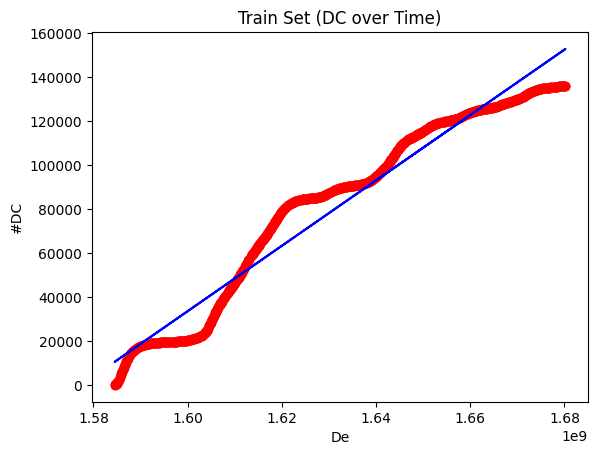

In [391]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Train Set (DC over Time)')
plt.xlabel('De')
plt.ylabel('#DC')
plt.show()

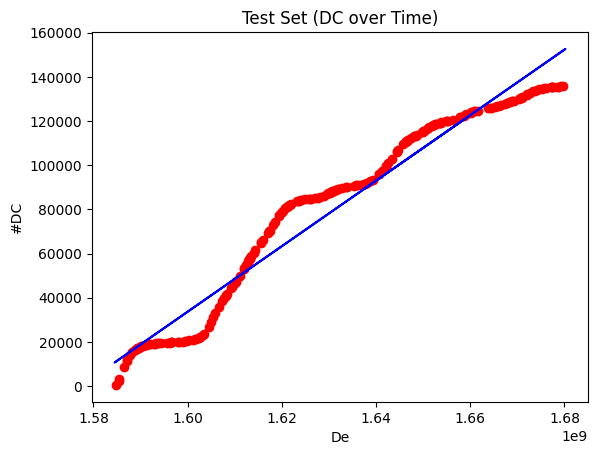

In [392]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Test Set (DC over Time)')
plt.xlabel('De')
plt.ylabel('#DC')
plt.show()

In [393]:
print('RMSE:', mean_squared_error(y_train,regression.predict(X_train)))
print('RMSE Test:', mean_squared_error(y_test,regression.predict(X_test)))

RMSE: 75202169.9318631
RMSE Test: 76556410.03992502


RMSE: 2020 17229962.300168946
RMSE Test: 2020 17113846.796602204
RMSE: 2021 26902879.269444212
RMSE Test: 2021 28169989.324616246
RMSE: 2022 5711656.266405456
RMSE Test: 2022 7003640.346781258
RMSE: 2023 49016.77447741392
RMSE Test: 2023 82688.4815276927


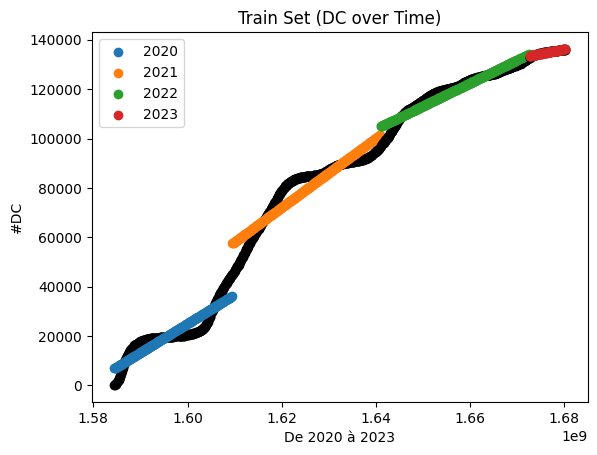

In [394]:
years = ['2020','2021','2022','2023']

for year in years:
    df = dates_to_int64((df_dc[(df_dc['dates'].dt.year == pd.to_datetime(year,format='%Y').year)]).copy())
    X_train, X_test, y_train, y_test, regression = train_model(df)

    plt.scatter(X_train, y_train, color = 'black')
    plt.scatter(X_train, regression.predict(X_train),label=year)

    print('RMSE:',year, mean_squared_error(y_train,regression.predict(X_train)))
    print('RMSE Test:',year, mean_squared_error(y_test,regression.predict(X_test)))

plt.title('Train Set (DC over Time)')
plt.xlabel('De 2020 à 2023')
plt.ylabel('#DC')
plt.legend()
plt.show()

### Decision Tree Regressor

In [395]:
df_tree = dates_to_int64(df_dc.copy())
X_train, X_test, y_train, y_test, regression = train_model(df_tree)

In [396]:
tree_regressor = DecisionTreeRegressor(max_leaf_nodes=5)
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

In [397]:
y_pred = tree_regressor.predict(X_test)

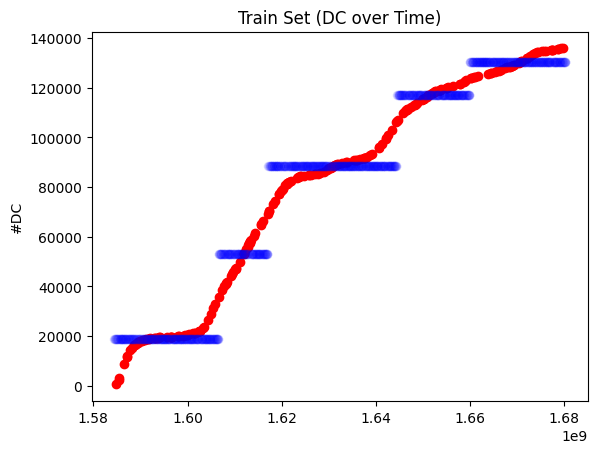

In [398]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, tree_regressor.predict(X_train), color = 'blue',alpha=0.1)
plt.title('Train Set (DC over Time)')
plt.xlabel('')
plt.ylabel('#DC')
plt.show()

In [399]:
points = tree_regressor.tree_.threshold
points = np.append(np.sort(points[points > 0]),-1)
print(points)


[ 1.6066080e+09  1.6170624e+09  1.6444080e+09  1.6598736e+09
 -1.0000000e+00]


RMSE: 2020-11-29 01:00:00 10794304.625458091
RMSE Test: 2020-11-29 01:00:00 11720603.159445764
RMSE: 2021-03-30 02:00:00 115531.42931221309
RMSE Test: 2021-03-30 02:00:00 103128.84814520525
RMSE: 2022-02-09 13:00:00 4494005.441439073
RMSE Test: 2022-02-09 13:00:00 4157333.8040378485
RMSE: 2022-08-07 14:00:00 866921.9571336047
RMSE Test: 2022-08-07 14:00:00 577138.4693700005
RMSE: 2023-03-31 02:00:00 334041.18255836755
RMSE Test: 2023-03-31 02:00:00 431038.27183871437


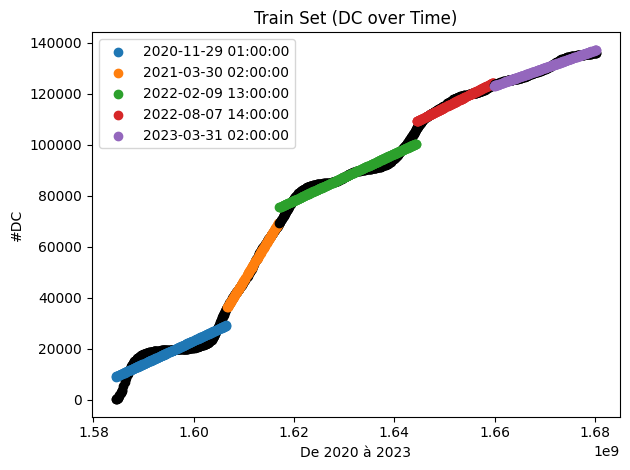

In [402]:
previous_point = 0
df = dates_to_int64(df_dc.copy())

for point in points:
    if point > 0:
        X_train, X_test, y_train, y_test, regression = train_model(df[(df['dates'] >= previous_point) & (df['dates'] < point)])
        # print(df[(df['dates'] > previous_point) & (df['dates'] < point)])
        label = datetime.fromtimestamp(point)
    else:
        X_train, X_test, y_train, y_test, regression = train_model(df[(df['dates'] >= previous_point)])
        # print(df[(df['dates'] > previous_point)])
        label = datetime.fromtimestamp(df['dates'].max())
    
    previous_point = point

    # plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color = 'black')
    plt.scatter(X_train, regression.predict(X_train),label=label)

    # plt.subplot(1, 2, 2)
    # plt.scatter(X_test, y_test, color = 'pink')
    # plt.scatter(X_test, regression.predict(X_test),label=label)

    print('RMSE:',label, mean_squared_error(y_train,regression.predict(X_train)))
    print('RMSE Test:',label, mean_squared_error(y_test,regression.predict(X_test)))

# plt.subplot(1, 2, 1)
plt.title('Train Set (DC over Time)')
plt.xlabel('De 2020 à 2023')
plt.ylabel('#DC')
plt.tight_layout()
plt.legend()

# plt.subplot(1, 2, 2)
# plt.title('Test Set (DC over Time)')
# plt.xlabel('De 2020 à 2023')
# plt.ylabel('#DC')
# plt.tight_layout()
# plt.legend()

plt.show()